In [1]:
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, 'Data')
from config import gkey

accident_data = pd.read_csv("accident_data.csv")

#severity index: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the 
#least impact on traffic (i.e., short delay as a result of the accident) and 
#4 indicates a significant impact on traffic (i.e., long delay).

In [2]:
#Data cleanup 

#Filters out dates containing 2016, 2017, & 2019 -- too much data in dataset to handle with laptops
traffic_accident_df = accident_data[~accident_data["Start_Time"].str.contains("2016")]
traffic_accident_df = traffic_accident_df[~traffic_accident_df["Start_Time"].str.contains("2017")]
traffic_accident_df = traffic_accident_df[~traffic_accident_df["Start_Time"].str.contains("2019")]

# Splits the Start_Time column into individual columns
traffic_accident_df[["Date", "Time"]] = traffic_accident_df["Start_Time"].str.split(expand=True)

# Renames columns to be more readable
traffic_accident_df = traffic_accident_df.rename(columns={"Start_Lat":"Lat", "Start_Lng":"Lng", "Weather_Condition":"Weather"})

# Filters and rearranges dataset to display most useful columns
traffic_accident_df = traffic_accident_df[["ID","Date", "Time", "Lat", "Lng", "City", "State",
         "County", "Weather", "Temperature(F)", "Severity"]]

# Iterates through all column data to find NaN values and adds them to a list
# df.columns[df.isna().any()].tolist()
# Output: ['City', 'Weather', 'Temperature(F)']

traffic_accident_df.head(10)

,ID,Date,Time,Lat,Lng,City,State,County,Weather,Temperature(F),Severity
626043,A-626044,12/31/2018,23:54,40.740047,-73.818512,Flushing,NY,Queens,Heavy Rain,46.9,3
626045,A-626046,12/31/2018,22:40,40.834370,-73.864113,Bronx,NY,Bronx,Rain,46.4,3
626355,A-626356,12/31/2018,12:35,38.441975,-88.953049,Dix,IL,Jefferson,Light Rain,57.0,3
626407,A-626408,12/31/2018,22:32,30.241417,-97.726158,Austin,TX,Travis,Partly Cloudy,39.9,2
626462,A-626463,12/31/2018,23:49,32.773060,-96.744247,Dallas,TX,Dallas,Clear,43.0,2
626463,A-626464,12/31/2018,23:49,32.818420,-96.802391,Dallas,TX,Dallas,Clear,43.0,2
626563,A-626564,12/31/2018,18:46,39.902153,-104.988914,Denver,CO,Adams,Snow,8.6,3
626574,A-626575,12/31/2018,22:26,32.192139,-110.857933,Tucson,AZ,Pima,Light Rain,37.4,2
626599,A-626600,12/31/2018,22:40,35.008537,-105.664352,Moriarty,NM,Torrance,Light Snow,27.9,3
626602,A-626603,12/31/2018,22:37,35.423836,-108.312744,Continental Divide,NM,McKinley,Light Snow,25.0,3


In [4]:
#Drop rows with null values

accident_data_non_na = traffic_accident_df.dropna(how='any')
accident_data_non_na.head(15)

,ID,Date,Time,Lat,Lng,City,State,County,Weather,Temperature(F),Severity
626043,A-626044,12/31/2018,23:54,40.740047,-73.818512,Flushing,NY,Queens,Heavy Rain,46.9,3
626045,A-626046,12/31/2018,22:40,40.834370,-73.864113,Bronx,NY,Bronx,Rain,46.4,3
626355,A-626356,12/31/2018,12:35,38.441975,-88.953049,Dix,IL,Jefferson,Light Rain,57.0,3
626407,A-626408,12/31/2018,22:32,30.241417,-97.726158,Austin,TX,Travis,Partly Cloudy,39.9,2
626462,A-626463,12/31/2018,23:49,32.773060,-96.744247,Dallas,TX,Dallas,Clear,43.0,2
626463,A-626464,12/31/2018,23:49,32.818420,-96.802391,Dallas,TX,Dallas,Clear,43.0,2
626563,A-626564,12/31/2018,18:46,39.902153,-104.988914,Denver,CO,Adams,Snow,8.6,3
626574,A-626575,12/31/2018,22:26,32.192139,-110.857933,Tucson,AZ,Pima,Light Rain,37.4,2
626599,A-626600,12/31/2018,22:40,35.008537,-105.664352,Moriarty,NM,Torrance,Light Snow,27.9,3
626602,A-626603,12/31/2018,22:37,35.423836,-108.312744,Continental Divide,NM,McKinley,Light Snow,25.0,3


In [6]:
#Display all weather types listed in df

accident_data_non_na['Weather'].value_counts()

Clear                                  124906
Overcast                                60590
Mostly Cloudy                           51722
Scattered Clouds                        35580
Partly Cloudy                           34387
Light Rain                              18800
Haze                                     6684
Rain                                     4708
Light Snow                               3144
Heavy Rain                               2112
Fog                                      2074
Light Drizzle                            1560
Thunderstorm                             1164
Light Thunderstorms and Rain             1158
Smoke                                     897
Heavy Thunderstorms and Rain              614
Thunderstorms and Rain                    469
Patches of Fog                            468
Mist                                      344
Drizzle                                   335
Snow                                      216
Shallow Fog                       

In [7]:
#Rename low-count weather conditions to be included into a larger group, better suited for graphing

                                                     #Cloudy conditions
updated_accident_data = accident_data_non_na.replace({"Mostly Cloudy": "Cloudy", "Scattered Clouds": "Cloudy", 
                                                      "Partly Cloudy": "Cloudy",       
                                             #Rain Conditions
                                             "Light Rain": "Rain", "Heavy Rain": "Rain", "Light Drizzle": "Rain", 
                                             "Light Thunderstorms and Rain": "Rain", "Heavy Thunderstorms and Rain": "Rain", 
                                             "Drizzle" : "Rain", "Light Freezing Rain": "Rain", "Heavy Drizzle" : "Rain", 
                                             "Light Rain Showers" : "Rain", "Thunderstorms and Rain": "Rain",
                                             "Light Freezing Drizzle": "Rain", "Squalls" : "Rain", "Rain Showers" : "Rain", 
                                             "Thunderstorm" : "Rain", 
                                              #Fog Conditions        
                                             "Patches of Fog": "Fog", "Shallow Fog": "Fog", "Mist": "Fog", 
                                             "Light Freezing Fog": "Fog", "Haze": "Fog", "Light Haze": "Fog", 
                                             #Snow Conditions
                                             "Light Snow": "Snow", "Blowing Snow": "Snow", "Light Snow Showers": "Snow",
                                             "Heavy Snow": "Snow", "Light Thunderstorms and Snow": "Snow",
                                             "Thunderstorms and Snow": "Snow",
                                             #Misc/Other Weather Conditions  
                                             "Light Ice Pellets":"Misc/Other", "Small Hail":"Misc/Other",
                                             "Light Hail":"Misc/Other", "Heavy Thunderstorms with Small Hail":"Misc/Other",
                                             "Ice Pellets":"Misc/Other", "Smoke":"Misc/Other", "Heavy Smoke":"Misc/Other",
                                             "Volcanic Ash":"Misc/Other", "Widespread Dust":"Misc/Other"})

updated_accident_data["Weather"].value_counts()

Clear         124906
Cloudy        121689
Overcast       60590
Rain           31163
Fog             9836
Snow            3424
Misc/Other       965
Name: Weather, dtype: int64

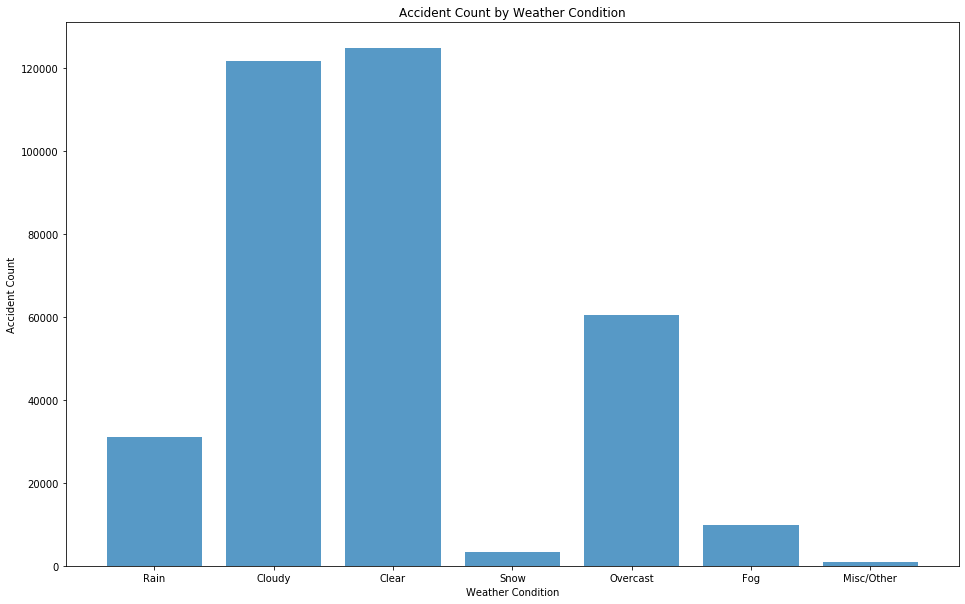

In [10]:
# Graph 1: Accident Count by Severity

weather_condit = updated_accident_data.Weather.unique()
weather_condit
accident_count = []

for i in updated_accident_data.Weather.unique():
    accident_count.append(updated_accident_data[updated_accident_data["Weather"] ==i].count()['ID'])
    
plt.figure(figsize=(16,10))
plt.title("Accident Count by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")

plt.bar(weather_condit, accident_count, alpha=0.75, align="center")

plt.savefig("accident_count.png")
plt.show()

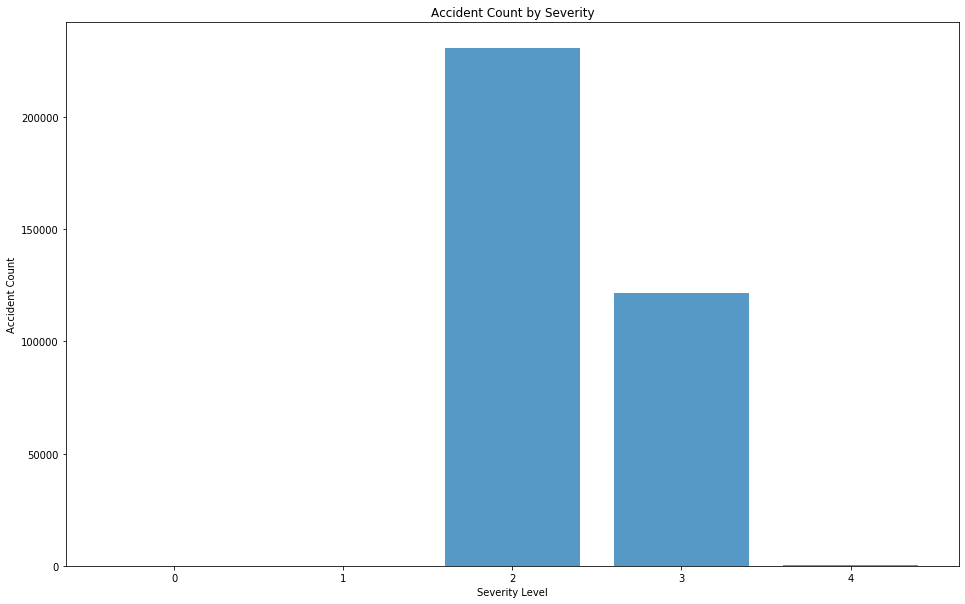

In [11]:
# Graph 2: Accident Count by Severity
severity_type = updated_accident_data.Severity.unique()
severity_type
accident_count = []

for i in updated_accident_data.Severity.unique():
    accident_count.append(updated_accident_data[updated_accident_data["Severity"] ==i].count()['ID'])
    
plt.figure(figsize=(16,10))
plt.title("Accident Count by Severity")
plt.xlabel("Severity Level")
plt.ylabel("Accident Count")

plt.bar(severity_type, accident_count, alpha=0.75, align="center")

#plt.legend(loc = "best", fontsize = "small", fancybox = True)
plt.show()